Class 1 Centroid: ast_0      0.388183
ast_1      0.307887
ast_2      0.734223
ast_3     -0.351001
ast_4     -0.514872
             ...   
ast_763   -1.467293
ast_764   -0.822687
ast_765    0.637195
ast_766    1.575193
ast_767    2.158359
Length: 768, dtype: float64
Class 2 Centroid: ast_0      0.164724
ast_1     -0.059393
ast_2      0.823305
ast_3     -0.525758
ast_4     -0.453648
             ...   
ast_763   -1.136520
ast_764   -0.881832
ast_765    0.798419
ast_766    1.576456
ast_767    2.409734
Length: 768, dtype: float64
Class 1 Spread: ast_0      0.688658
ast_1      0.724242
ast_2      0.600875
ast_3      0.681474
ast_4      0.704864
             ...   
ast_763    0.887673
ast_764    0.448406
ast_765    0.500154
ast_766    0.743473
ast_767    0.851381
Length: 768, dtype: float64
Class 2 Spread: ast_0      0.739515
ast_1      0.885482
ast_2      0.686057
ast_3      0.717572
ast_4      0.768061
             ...   
ast_763    0.931462
ast_764    0.466805
ast_765    0.675064
ast_766 

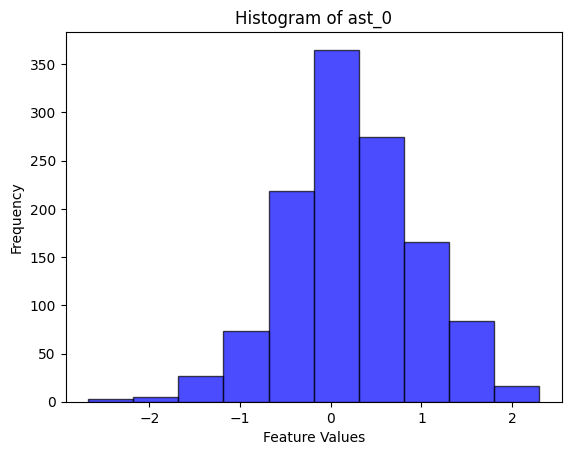

Mean of Feature: 0.24072209031574676
Variance of Feature: 0.5333870297998605


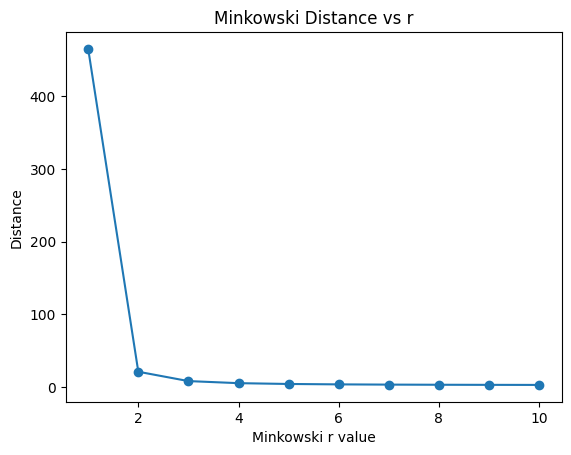

Test set accuracy (k=3): 0.6297
Training set accuracy (k=3): 0.8179
First 5 predictions: [0 0 0 0 1]
First 5 actual values: [0 0 1 1 0]


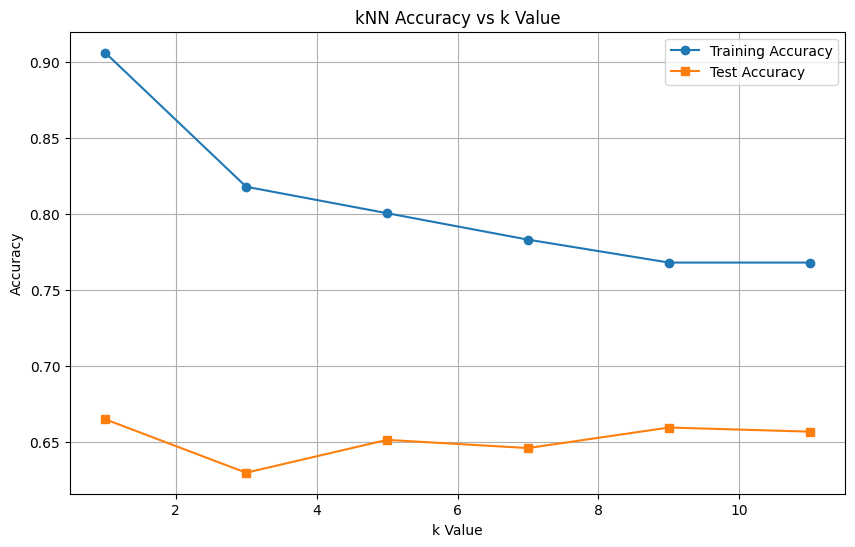

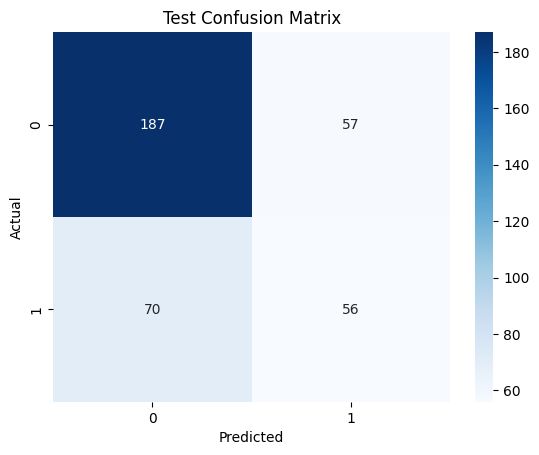

Precision: 0.4956
Recall: 0.4444
F1-Score: 0.4686


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from scipy.spatial.distance import minkowski

# Load dataset
file_path = "/content/10-Java_AST_in_.xlsx"
df = pd.read_excel(file_path)

# Compute median of Final_Marks and create binary target
if "Final_Marks" in df.columns:
    median_final_marks = df["Final_Marks"].median()
    df["Trend"] = (df["Final_Marks"] > median_final_marks).astype(int)
else:
    raise ValueError("Final_Marks column not found in dataset.")

# Select features dynamically based on dataset structure
feature_columns = [col for col in df.columns if col.startswith("ast_")]
if not feature_columns:
    raise ValueError("No feature columns found with prefix 'ast_'.")
X = df[feature_columns]
y = df["Trend"]

# Handle missing values
X = X.fillna(X.mean())

# A1: Intraclass spread and interclass distances
class1_vectors = X[y == 1]
class2_vectors = X[y == 0]
centroid1 = np.mean(class1_vectors, axis=0)
centroid2 = np.mean(class2_vectors, axis=0)
spread1 = np.std(class1_vectors, axis=0)
spread2 = np.std(class2_vectors, axis=0)
distance_between_centroids = np.linalg.norm(centroid1 - centroid2)
print("Class 1 Centroid:", centroid1)
print("Class 2 Centroid:", centroid2)
print("Class 1 Spread:", spread1)
print("Class 2 Spread:", spread2)
print("Distance between centroids:", distance_between_centroids)

# A2: Histogram for one feature
feature_index = 'ast_0'  # Change if needed
feature_data = X[feature_index]
plt.hist(feature_data, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title(f'Histogram of {feature_index}')
plt.show()
print("Mean of Feature:", np.mean(feature_data))
print("Variance of Feature:", np.var(feature_data))

# A3: Minkowski Distance for two feature vectors
vector1 = X.iloc[0]
vector2 = X.iloc[1]
r_values = range(1, 11)
minkowski_distances = [minkowski(vector1, vector2, p=r) for r in r_values]
plt.plot(r_values, minkowski_distances, marker='o', linestyle='-')
plt.xlabel('Minkowski r value')
plt.ylabel('Distance')
plt.title('Minkowski Distance vs r')
plt.show()

# A4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# A5: Train kNN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# A6: Evaluate accuracy
test_accuracy = knn.score(X_test_scaled, y_test)
train_accuracy = knn.score(X_train_scaled, y_train)
print(f"Test set accuracy (k=3): {test_accuracy:.4f}")
print(f"Training set accuracy (k=3): {train_accuracy:.4f}")

# A7: Prediction behavior
y_pred = knn.predict(X_test_scaled)
print("First 5 predictions:", y_pred[:5])
print("First 5 actual values:", y_test.iloc[:5].values)

# A8: Vary k from 1 to 11
k_values = range(1, 12, 2)
train_scores = []
test_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, marker='o', label='Training Accuracy')
plt.plot(k_values, test_scores, marker='s', label='Test Accuracy')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('kNN Accuracy vs k Value')
plt.legend()
plt.grid(True)
plt.show()

# A9: Confusion Matrix and Performance Metrics
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test Confusion Matrix")
plt.show()
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")
